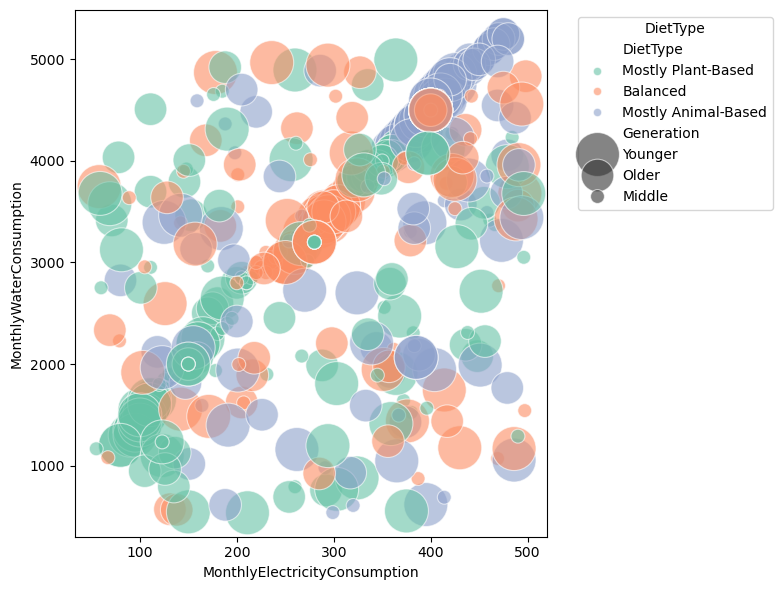

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('lifestyle_sustainability_data.csv')
# Sample data
df['Generation']= df['Age'].apply(lambda a: 'Older' if a > 55 else 'Middle' if 55>a >35 else 'Younger')
df['AwarenessCount'] = df['EnvironmentalAwareness'].map(df['EnvironmentalAwareness'].value_counts())
# Plot
plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(
    data=df,
    x='MonthlyElectricityConsumption',
    y='MonthlyWaterConsumption',
    size=df['Generation'],
    hue='DietType',
    palette='Set2',
    sizes=(100, 1000),
    alpha=0.6
)

# Formatting

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='DietType')
plt.tight_layout()
plt.show()

In [44]:
color_map = {'Mostly Plant-Based': 'forestgreen',
             'Balanced': 'cornflowerblue',
             'Mostly Animal-Based': 'firebrick',
             'Older': 'peru',
             'Middle': 'gold',
             'Younger': 'mediumslateblue'}

<Axes: xlabel='MonthlyWaterConsumption', ylabel='DietType'>

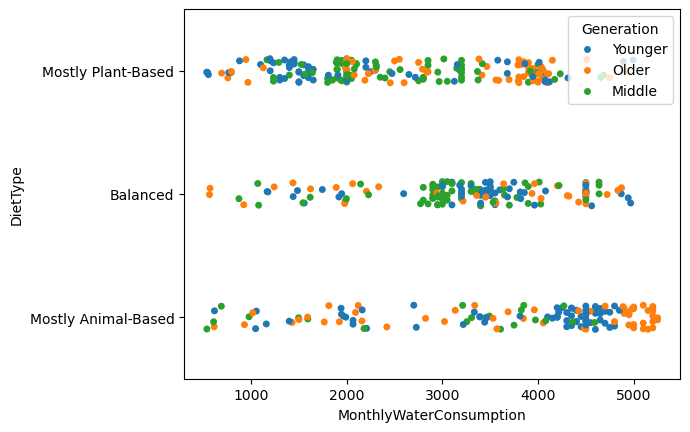

In [45]:
sns.stripplot(x = df['MonthlyWaterConsumption'],
              y = df['DietType'],
             hue= df['Generation'])

In [45]:
print(counts)

Series([], Name: count, dtype: int64)


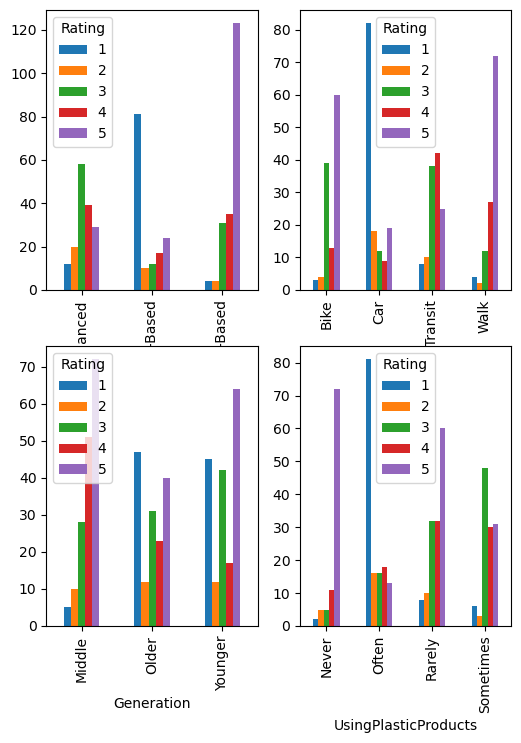

In [63]:
import matplotlib.pyplot as plt
import pandas as pd
fig, axes = plt.subplots(nrows= 2, ncols=2, figsize=(6,8))
axes = axes.flatten()

diet = pd.crosstab(df['DietType'], df['Rating'])
transportation= pd.crosstab(df['TransportationMode'], df['Rating'])
generation= pd.crosstab(df['Generation'], df['Rating'])
plastic= pd.crosstab(df['UsingPlasticProducts'], df['Rating'])

types = [diet, transportation,generation,plastic]

for i, t in enumerate(types):
    t.plot(kind='bar', ax=axes[i], legend=True)




plt.show()


                       0
DietType                
Mostly Plant-Based   114
Balanced              55
Mostly Animal-Based   37
206
41 % of total reults were 5 star
Of those, 55% were Plant-Based diet


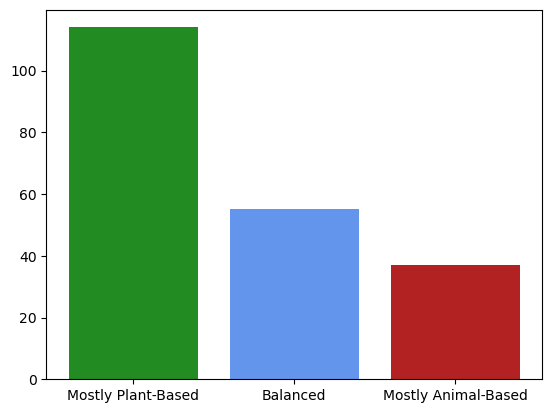

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('lifestyle_sustainability_data.csv')
order=['Mostly Plant-Based', 'Balanced', 'Mostly Animal-Based']
fig, ax = plt.subplots()
df_highrating = df[['DietType', 'EnvironmentalAwareness']]
fives = df_highrating[df_highrating['EnvironmentalAwareness']>=4].groupby('DietType').size().reindex(order)
ax.bar(fives.index, fives.values, color=[color_map.get(g) for g in fives.index])

fives = fives.to_frame()
print(fives)

total = sum(fives[0])
print(total)
total_percent= round((total/499)*100)
plant = round((114/206)*100)
print(f'{total_percent} % of total reults were 5 star')
print(f'Of those, {plant}% were Plant-Based diet')

In [67]:
df.head(5)

df.describe()

,ParticipantID,Age,HomeSize,EnvironmentalAwareness,MonthlyElectricityConsumption,MonthlyWaterConsumption,Rating
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,250.024048,44.052104,1518.046092,3.062124,291.963928,3139.521042,3.430862
std,144.233925,14.904828,672.212235,1.342145,120.482275,1224.609306,1.502585
min,1.000000,18.000000,407.000000,1.000000,55.000000,536.000000,1.000000
25%,125.500000,31.000000,951.500000,2.000000,185.000000,2000.000000,2.000000
50%,250.000000,44.000000,1450.000000,3.000000,295.000000,3350.000000,4.000000
75%,374.500000,58.000000,1995.000000,4.000000,400.000000,4100.000000,5.000000
max,500.000000,96.000000,2997.000000,5.000000,498.000000,5250.000000,5.000000


In [69]:
df['UsingPlasticProducts'].value_counts()

UsingPlasticProducts
Often        144
Rarely       142
Sometimes    118
Never         95
Name: count, dtype: int64

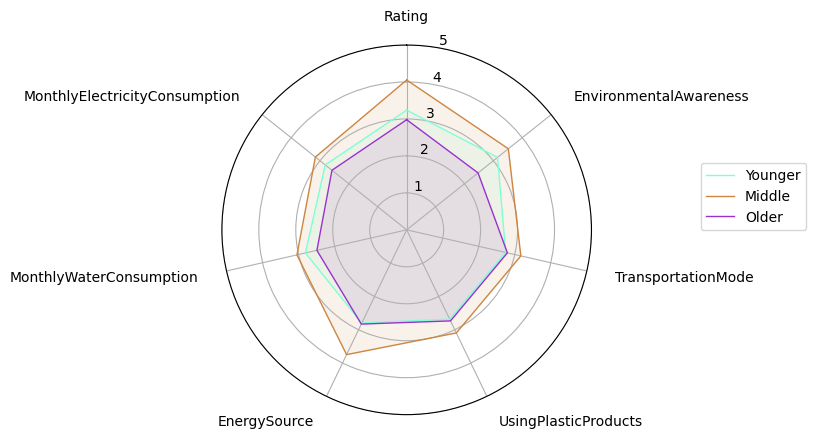

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi

df = pd.read_csv('lifestyle_sustainability_data.csv')
df['Generation']= df['Age'].apply(lambda a: 'Older' if a > 55 else 'Middle' if 55>a >35 else 'Younger')


# number of variables
categories= ['Rating','EnvironmentalAwareness', 
             'TransportationMode', 'UsingPlasticProducts',
             'EnergySource', 'MonthlyWaterConsumption',
             'MonthlyElectricityConsumption']       
N = len(categories)

energy_map = {'Non-Renewable': 1, 'Renewable': 3, 'Mixed': 2}
transport_map = {'Car': 1, 'Bike': 3, 'Public Transit': 2, 'Walk': 4}
plastic_map = {'Often': 1, 'Sometimes': 2, 'Rarely': 3, 'Never': 4}


def rescale( series, original_levels):
    '''def rescale(series, original_levels):
    
    Rescales an ordinal variable from its original scale to a new 1–5 scale.

    Parameters:
    - series: a pandas Series with ordinal values (e.g., 1 to 3 or 1 to 4).
    - original_levels: the number of levels in the original scale.

    Returns:
    - A Series scaled so the lowest value becomes 1 and the highest becomes 5,
      with all intermediate values evenly spaced in between.
      
    '''

    return 1 + (series - 1) * 4 / (original_levels - 1)


df['EnergySource'] = df['EnergySource'].map(energy_map)
df['EnergySource'] = rescale(df['EnergySource'], 3)

df['TransportationMode'] = df['TransportationMode'].map(transport_map)
df['TransportationMode'] = rescale(df['TransportationMode'], 4)

df['UsingPlasticProducts'] = df['UsingPlasticProducts'].map(plastic_map)
df['UsingPlasticProducts'] = rescale(df['UsingPlasticProducts'], 4)

min_value_water = df['MonthlyWaterConsumption'].min()
max_value_water = df['MonthlyWaterConsumption'].max()
inverted_max_value_water = max_value_water - df['MonthlyWaterConsumption']
df['MonthlyWaterConsumption'] = 1 + (inverted_max_value_water * 4) / (max_value_water - min_value_water)

min_value_electric = df['MonthlyElectricityConsumption'].min()
max_value_electric = df['MonthlyElectricityConsumption'].max()
inverted_max_value_electric = max_value_electric - df['MonthlyElectricityConsumption']
df['MonthlyElectricityConsumption'] = 1 + (inverted_max_value_electric * 4) / (max_value_electric - min_value_electric)


df_generation = df.groupby('Generation')[categories].mean().reset_index()

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(10)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

ax.set_ylim(0, 5)
ax.tick_params(axis='x', pad=10)

for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')

values= df_generation.loc[2, categories].values.flatten().tolist()
values += values[:1] 
ax.plot(angles, values, linewidth=1, linestyle='solid', color = 'aquamarine', label= 'Younger')
ax.fill(angles, values, 'aquamarine', alpha=0.1)


values= df_generation.loc[0, categories].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', color = 'peru', label= 'Middle')
ax.fill(angles, values, 'peru', alpha=0.1)
 

values= df_generation.loc[1, categories].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', color = 'darkorchid', label= 'Older')
ax.fill(angles, values, 'darkorchid', alpha=0.1)


plt.legend( loc='upper right', bbox_to_anchor=(1.6, .7))

plt.show()

In [73]:
max_value_electric

498

In [75]:
inverted_max_value_electric

0      398
1      248
2       98
3      348
4      198
      ... 
494    348
495     98
496    218
497    101
498    113
Name: MonthlyElectricityConsumption, Length: 499, dtype: int64

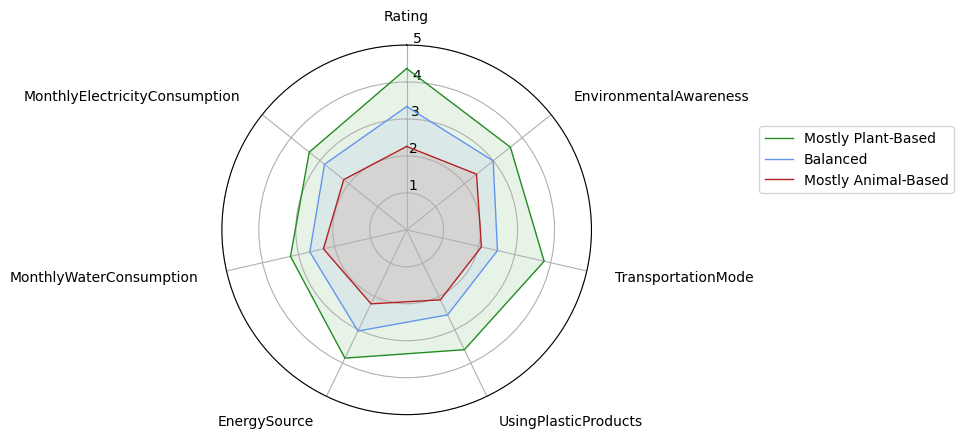

In [428]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi

df = pd.read_csv('lifestyle_sustainability_data.csv')
df['Generation']= df['Age'].apply(lambda a: 'Older' if a > 55 else 'Middle' if 55>a >35 else 'Younger')


# number of variables
categories= ['Rating','EnvironmentalAwareness', 
             'TransportationMode', 'UsingPlasticProducts',
             'EnergySource', 'MonthlyWaterConsumption',
             'MonthlyElectricityConsumption']             
N = len(categories)

energy_map = {'Non-Renewable': 1, 'Renewable': 3, 'Mixed': 2}
transport_map = {'Car': 1, 'Bike': 3, 'Public Transit': 2, 'Walk': 4}
plastic_map = {'Often': 1, 'Sometimes': 2, 'Rarely': 3, 'Never': 4}


def rescale( series, original_levels):
    '''def rescale(series, original_levels):
    
    Rescales an ordinal variable from its original scale to a new 1–5 scale.

    Parameters:
    - series: series with ordinal values.
    - original_levels: the number of levels in the original scale.

    Returns:
    - A Series scaled so that lowest value becomes 1 and the highest becomes 5,
      and all other values evenly spaced in between.
      
    '''

    return 1 + (series - 1) * 4 / (original_levels - 1)


df['EnergySource'] = df['EnergySource'].map(energy_map)
df['EnergySource'] = rescale(df['EnergySource'], 3)

df['TransportationMode'] = df['TransportationMode'].map(transport_map)
df['TransportationMode'] = rescale(df['TransportationMode'], 4)

df['UsingPlasticProducts'] = df['UsingPlasticProducts'].map(plastic_map)
df['UsingPlasticProducts'] = rescale(df['UsingPlasticProducts'], 4)

min_value_water = df['MonthlyWaterConsumption'].min()
max_value_water = df['MonthlyWaterConsumption'].max()
inverted_max_value_water = max_value_water - df['MonthlyWaterConsumption']
df['MonthlyWaterConsumption'] = 1 + (inverted_max_value_water * 4) / (max_value_water - min_value_water)

min_value_electric = df['MonthlyElectricityConsumption'].min()
max_value_electric = df['MonthlyElectricityConsumption'].max()
inverted_max_value_electric = max_value_electric - df['MonthlyElectricityConsumption']
df['MonthlyElectricityConsumption'] = 1 + (inverted_max_value_electric * 4) / (max_value_electric - min_value_electric)


df_diet = df.groupby('DietType')[categories].mean().reset_index()

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
ax.set_aspect('equal')
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw ylabel
                        
ax.set_rlabel_position(2)
ax.set_ylim(0, 5)

ax.tick_params(axis='x', pad=10)

for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')


values= df_diet[df_diet['DietType'] == 'Mostly Plant-Based'][categories].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', color ='forestgreen', label= 'Mostly Plant-Based')
ax.fill(angles, values, 'forestgreen', alpha=0.1)


values=df_diet[df_diet['DietType'] == 'Balanced'][categories].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', color ='cornflowerblue', label= 'Balanced')
ax.fill(angles, values, 'cornflowerblue', alpha=0.1)
 

values= df_diet[df_diet['DietType'] == 'Mostly Animal-Based'][categories].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', color = 'firebrick', label= 'Mostly Animal-Based')
ax.fill(angles, values, 'firebrick', alpha=0.1)


plt.legend( loc='upper right', bbox_to_anchor=(2, .8))

plt.show()

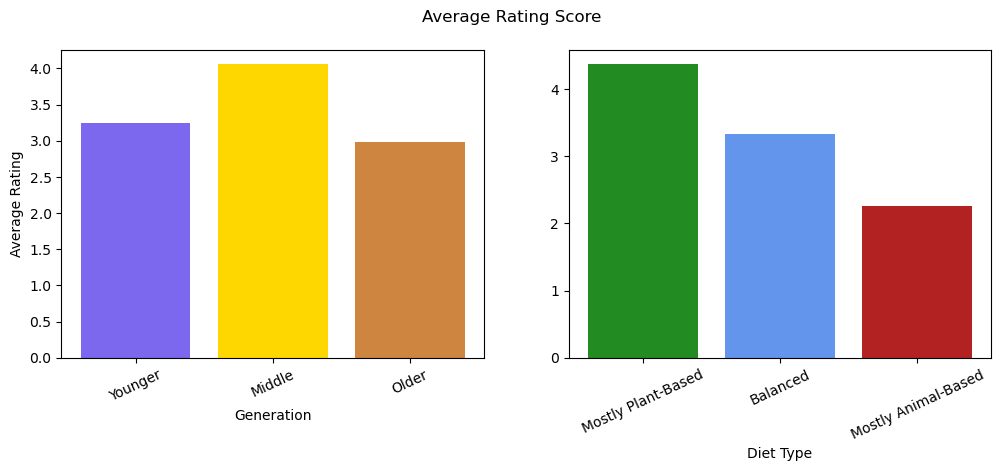

Generation
Younger    3.238889
Middle     4.054217
Older      2.980392
Name: Rating, dtype: float64
DietType
Mostly Plant-Based     4.365482
Balanced               3.335443
Mostly Animal-Based    2.256944
Name: Rating, dtype: float64


In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('lifestyle_sustainability_data.csv')
df['Generation']= df['Age'].apply(lambda a: 'Older' if a > 55 else 'Middle' if 55>a >35 else 'Younger')
numeric_cols = df.select_dtypes(include='number').columns # get ony cloumns with numeric data, so that agg function will work

fig, (ax1,ax2) = plt.subplots(1,2 , figsize=(12,4))

generation_order=['Younger', 'Middle', 'Older']
diet_order = ['Mostly Plant-Based', 'Balanced', 'Mostly Animal-Based']
              

df_generation = df.groupby('Generation')['Rating'].mean()
df_generation = df_generation.reindex(generation_order)
ax1.bar( df_generation.index, df_generation.values, color = [color_map.get(g) for g in df_generation.index])

df_diet = df.groupby('DietType')['Rating'].mean() # select desired column from aggregated numeric columns
df_diet = df_diet.reindex(diet_order)
ax2.bar(df_diet.index, df_diet.values, color = [color_map.get(d) for d in df_diet.index])

for ax in [ax1, ax2]:
    for label in ax.get_xticklabels():
        label.set_rotation(25)
ax1.set_ylabel('Average Rating')


plt.suptitle('Average Rating Score')
ax1.set_xlabel('Generation')
ax2.set_xlabel('Diet Type')

plt.show()

print(df_generation)
print(df_diet)

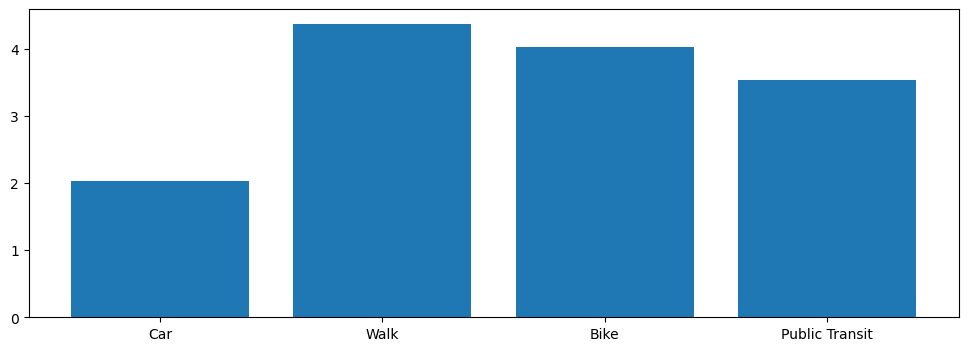

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('lifestyle_sustainability_data.csv')
df['Generation']= df['Age'].apply(lambda a: 'Older' if a > 55 else 'Middle' if 55>a >35 else 'Younger')
numeric_cols = df.select_dtypes(include='number').columns # get ony cloumns with numeric data, so that agg function will work

fig, ax = plt.subplots(figsize=(12,4))

transportation_order=['Car', 'Walk', 'Bike', 'Public Transit']

              

df_transportation = df.groupby('TransportationMode')['Rating'].mean()
df_transportation = df_transportation.reindex(transportation_order)
ax.bar(df_transportation.index, df_transportation.values)



plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (6,) and arg 1 with shape (2,).

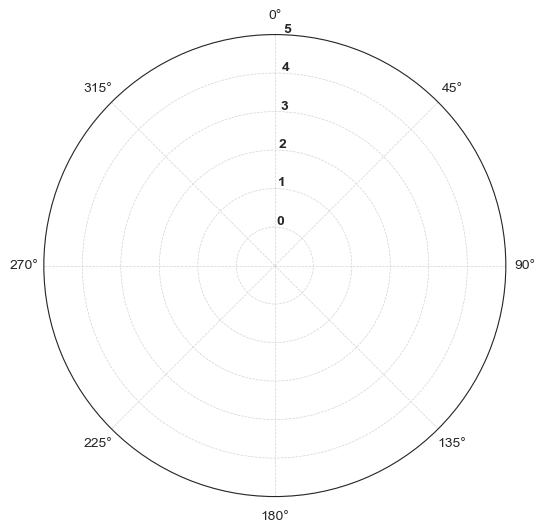

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi
from matplotlib.patches import Patch

df = pd.read_csv('lifestyle_sustainability_data.csv')
df['Generation']= df['Age'].apply(lambda a: 'Older' if a > 55 else 'Middle' if 55>a >35 else 'Younger')


def get_label_rotation(angle, offset):
    
    rotation = np.rad2deg(angle + offset)
    if angle <= np.pi:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    return rotation, alignment

def add_labels(angles, values, labels, offset, ax):
    
    padding = 2
    
    for angle, value, label, in zip(angles, values, labels):
        angle = angle
        
        rotation, alignment = get_label_rotation(angle, offset)

        ax.text(
            x=angle, 
            y=value + padding, 
            s=label, 
            ha=alignment, 
            va="center", 
            rotation=rotation, 
            rotation_mode="anchor") 


circle_df = df.melt(id_vars = 'EnvironmentalAwareness', value_vars = ['DietType', 'Generation'],
                    var_name = 'DietAndGeneration' , value_name = 'Type')
circle_df
# generation_order=['Younger', 'Middle', 'Older']
# diet_order = ['Mostly Plant-Based', 'Balanced', 'Mostly Animal-Based']

# # number of variables
categories= circle_df['Type'].unique()
circle_df = circle_df.groupby('DietAndGeneration')['EnvironmentalAwareness'].mean()

# df_diet = df_diet.reindex(diet_order).sort_index(ascending=False)
# color1 = [color_map.get(d) for d in df_diet.index]

N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
width = 2*np.pi / len(categories) *.5
offset = width / 2 

# Initialise the spider plot
sns.set_style("white")

plt.figure(figsize=(16,6))
ax = plt.subplot(111, polar=True)
ax.set_aspect('equal')
plt.grid(True, color='lightgray', linestyle='--', linewidth=0.5)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
ax.set_rlabel_position(2)
ax.set_ylim(-1, 5)

for label in ax.get_yticklabels():
    label.set_fontweight('bold') 
               



bars = ax.bar(
    x=angles, 
    height=circle_df, 
    width= width,
    linewidth=2,
    bottom = 0,
    edgecolor="white", 
    alpha = .8
    
)




# # ax.set_xticks([a - offset for a in angles]) 
# # ax.set_xticklabels(diet_order, fontweight='bold')





# categories= df['Generation'].unique()
# df_generation = df.groupby('Generation')['EnvironmentalAwareness'].mean()

# df_generation = df_generation.reindex(generation_order).sort_index(ascending=False)
# color2 = [color_map.get(g) for g in df_generation.index]


# bars2 = ax.bar(
#     x=[a + offset for a in angles], 
#     height=df_generation, 
#     width= width,
#     linewidth=2,
#     bottom = 0,
#     edgecolor="white",
#     color=color2, 
#     alpha = .8
# )
#  /

             0
Generation    
Younger     64
Middle      72
Older       40
176
35 % of total reults were 5 star,with 176 total five-star ratings..
Of those, 41% were Middle generation.
                       0
DietType                
Mostly Plant-Based   123
Balanced              29
Mostly Animal-Based   24
176
35 % of total reults were 5 star, with 176 total five-star ratings.
Of those, 70% were Plant-Based diet.


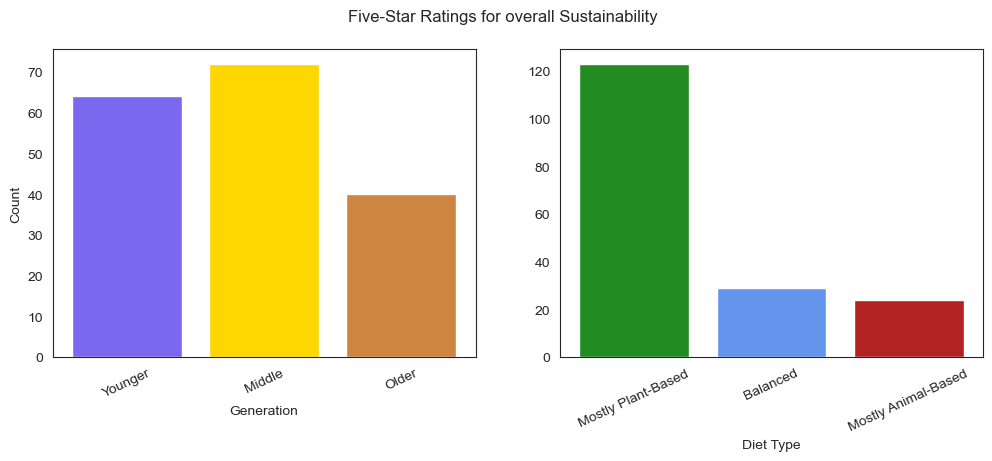

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('lifestyle_sustainability_data.csv')
df['Generation']= df['Age'].apply(lambda a: 'Older' if a > 55 else 'Middle' if 55>a >35 else 'Younger')

sns.set_style("white")
fig, (ax1,ax2) = plt.subplots(1,2 , figsize=(12,4))

generation_order=['Younger', 'Middle', 'Older']
df_highrating = df[['Generation', 'Rating']]
fives_generation = df_highrating[df_highrating['Rating']==5].groupby('Generation').size().reindex(generation_order)
ax1.bar(fives_generation.index, fives_generation.values, color =[color_map.get(g) for g in fives_generation.index])


colors_generation = [color_map.get(g) for g in fives_generation.index]


diet_order=['Mostly Plant-Based', 'Balanced', 'Mostly Animal-Based']
df_5rating = df[['DietType', 'Rating']]
fives_diet = df_5rating[df_5rating['Rating']==5].groupby('DietType').size().reindex(diet_order)
ax2.bar(fives_diet.index, fives_diet.values, color=[color_map.get(d) for d in fives_diet.index])


colors_diet = [color_map.get(d) for d in fives_diet.index]

for ax in [ax1, ax2]:
    for label in ax.get_xticklabels():
        label.set_rotation(25)

plt.suptitle('Five-Star Ratings for overall Sustainability')
ax1.set_xlabel('Generation')
ax2.set_xlabel('Diet Type')
ax1.set_ylabel('Count')

fives_generation = fives_generation.to_frame()
fives_diet = fives_diet.to_frame()



print(fives_generation)
total_generation = sum(fives_generation[0])
print(total_generation)
total_generation_percent= round((total_generation/499)*100)
middle = round((72/176)*100)
print(f'{total_generation_percent} % of total reults were 5 star,with 176 total five-star ratings..')
print(f'Of those, {middle}% were Middle generation.')


print(fives_diet)
total_diet = sum(fives_diet[0])
print(total_diet)
total_diet_percent= round((total_diet/499)*100)
plant = round((123/176)*100)
print(f'{total_diet_percent} % of total reults were 5 star, with 176 total five-star ratings.')
print(f'Of those, {plant}% were Plant-Based diet.')

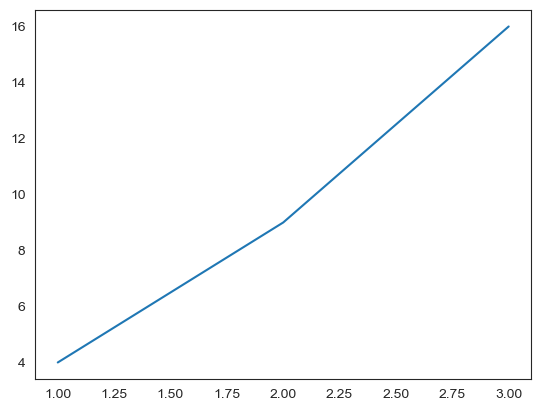

In [87]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3], [4, 9, 16])
plt.savefig('lineplot_avgelect_avgwater_diettype_generation.png')
